# Capturing Knowledge about Drug-Drug Interactions to Enhance Treatment Effectiveness

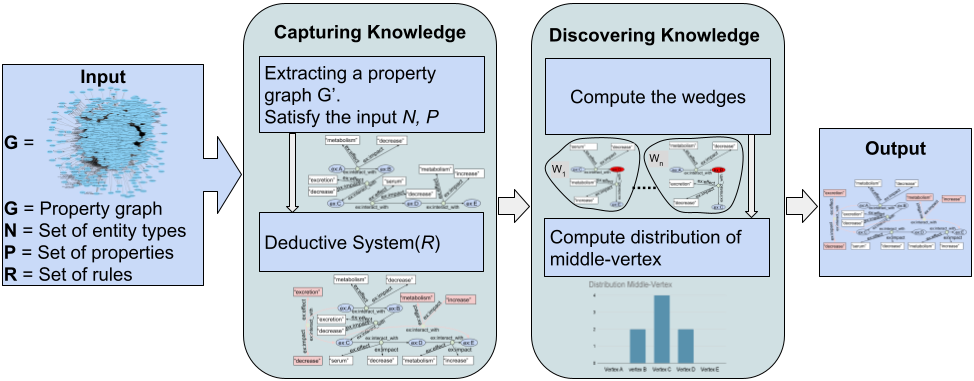

In [1]:
import auxiliar_wedge
import ipywidgets as widgets
from IPython.display import clear_output

from ipywidgets import GridspecLayout
import pandas as pd
import warnings

In [2]:
class data_handler():
    
    def set_value(self, adverse_event, union, set_dsd_label, comorbidity_drug, set_DDIs):
        self.adverse_event = adverse_event
        self.union = union
        self.set_dsd_label = set_dsd_label
        self.comorbidity_drug = comorbidity_drug
        self.set_DDIs = set_DDIs
        
    def set_value_frequency(self, dict_frequency):
        self.dict_frequency = dict_frequency
        
    def __init__(self):
        self.adverse_event = []
        self.union = pd.DataFrame()
        self.set_dsd_label = set()
        self.comorbidity_drug = set()
        self.set_DDIs = pd.DataFrame()
        self.dict_frequency = {}

w = data_handler()

# Input

In [7]:
df_cui = pd.read_csv('CUI_DrugBank.csv')
drug_list = list(df_cui.DrugName.unique())
# drug_list = [label.lower() for label in drug_list]
dict_drug_cui = dict(zip(df_cui.DrugName, df_cui.CUI_ID))

#### Input set of entities

In [8]:
drug_label1 = widgets.Combobox(
    # value='John',
    placeholder='Write a drug name',
    options=drug_list,
    description='Disease Drug:',
    ensure_option=True,
    disabled=False
)

drug_label2 = widgets.Combobox(
    # value='John',
    placeholder='Write a drug name',
    options=drug_list,
    description='Comorbidity Drug:',
    ensure_option=True,
    disabled=False
)
button_cui1 = widgets.Button(description="Add Drug")
button_cui2 = widgets.Button(description="Add Drug")

def create_expanded_button(description, button_style):
    return widgets.Button(description=description, button_style=button_style,
                          layout=widgets.Layout(height='auto', width='auto'))

grid = GridspecLayout(3, 3, height='150px')
grid[0, 0] = drug_label1 # label_cui1
grid[0, 1] = button_cui1
grid[0, 2] = widgets.Text(value='', disabled=True)
grid[1, 0] = drug_label2 # label_cui2
grid[1, 1] = button_cui2
grid[1, 2] = widgets.Text(value='', disabled=True)
grid[2, 0] = create_expanded_button('Restart Drugs', 'danger')
grid[2, 2] = create_expanded_button("""Extract property graph G""", 'success')
display(grid)
#"C0008838","C0078257"],"Non_OncologicalDrugs":["C0028978", "C0074554", "C0009214"]}

GridspecLayout(children=(Combobox(value='', description='Disease Drug:', ensure_option=True, layout=Layout(gri…

In [9]:
def button_cui1_clicked(parm):
    #input_data['oncological_drug'].append(grid[0, 0].value)
    grid[0, 2:].value +=',' + dict_drug_cui[grid[0, 0].value]
    grid[0, 0].value = ''
    
def button_cui2_clicked(parm):
    #input_data['non_oncological_drug'].append(grid[1, 0].value)
    grid[1, 2:].value+=',' + dict_drug_cui[grid[1, 0].value]
    grid[1, 0].value = ''

def button_restart_clicked(parm):
    grid[0, 0].value = ''
    grid[0, 2:].value = ''
    grid[1, 0].value = ''
    grid[1, 2:].value = ''

def button_traverse_kg_clicked(parm):
    input_data = {"oncological_drug":[], "non_oncological_drug":[]}
    input_data["oncological_drug"] = grid[0, 2:].value[1:].split(',')
    input_data["non_oncological_drug"]= grid[1, 2:].value[1:].split(',')
    print(input_data)
    adverse_event, union, set_dsd_label, comorbidity_drug, set_DDIs = auxiliar_wedge.load_data(input_data)
    w.set_value(adverse_event, union, set_dsd_label, comorbidity_drug, set_DDIs)


grid[0, 1].on_click(button_cui1_clicked)
grid[1, 1].on_click(button_cui2_clicked)
grid[2, 0].on_click(button_restart_clicked)
grid[2, 2].on_click(button_traverse_kg_clicked)

## Stage: Capturing Knowledge
#### first plot: property garph (Baseline)
#### second plot: property graph with capturing knowledge

In [ ]:
output = widgets.Output()
grid_capture_knowledge = GridspecLayout(4, 3, height='250px')
grid_capture_knowledge[0, 0] = create_expanded_button('Capture Knowledge', 'success')

def button_capture_knowledge_clicked(parm):
    with output:
        clear_output(wait=True)
        network_analysis, t = auxiliar_wedge.capture_knowledge(w.adverse_event, w.union, w.set_dsd_label,
                                                            w.comorbidity_drug, w.set_DDIs)
        file = open("output/Graph_initial.png", "rb")
        image = file.read()
        grid_capture_knowledge[0:, 1] = widgets.Image(value=image, format='png', width=300, height=400,) #1:4
        file = open("output/Graph_enriched.png", "rb")
        image = file.read()
        grid_capture_knowledge[0:, 2] = widgets.Image(value=image, format='png', width=300, height=400,) #4:
        #grid_capture_knowledge[0:, 3] = network_analysis
        display(network_analysis)
grid_capture_knowledge[0, 0].on_click(button_capture_knowledge_clicked)

display(grid_capture_knowledge, output)

## Stage: Discovering Knowledge
#### following plots: wedges for each drugs. Red node is the middle-vertex of the wedge

In [ ]:
output_1 = widgets.Output()
button_discovering_knowledge = create_expanded_button('Discovering Knowledge', 'success')

def button_discovering_knowledge_clicked(parm):
    with output_1:
        clear_output(wait=True)
        dict_graph_json, dict_frequency = auxiliar_wedge.discovering_knowledge(w.adverse_event, w.union,
                                                                               w.set_dsd_label, w.comorbidity_drug)
        dropdown_middle_vertex.options=dict_graph_json
        w.set_value_frequency(dict_frequency)

button_discovering_knowledge.on_click(button_discovering_knowledge_clicked)
display(button_discovering_knowledge, output_1)

## Select the middle-Vertex to study

In [ ]:
dropdown_middle_vertex = widgets.Dropdown(options = {}, description='Middle-Vertex:')
display(dropdown_middle_vertex)

## Visualize the wedges of the middle-vertex selected

In [ ]:
button = widgets.Button(description="Visualize")
output_2 = widgets.Output()
display(button, output_2)

def on_button_clicked(tfry):
    with output_2:
        clear_output(wait=True)
        display(auxiliar_wedge.create_graph_cytoscape(dropdown_middle_vertex.value))

button.on_click(on_button_clicked)

## Distribution of the middle-vertex of wedges
#### we can discover the drugs that decrease the effectiveness of the treatment

In [ ]:
output_3 = widgets.Output()
button_distribution_middle_vertex = create_expanded_button('Distribution middle-vertex', 'success')

def button_distribution_middle_vertex_clicked(parm):
    with output_3:
        clear_output(wait=True)
        (auxiliar_wedge.distribution_wedge(w.dict_frequency))

button_distribution_middle_vertex.on_click(button_distribution_middle_vertex_clicked)
display(button_distribution_middle_vertex, output_3)

## Compare the frequency distribution of wedges with knowledge capture and without knowledge capture (Baseline)

In [ ]:
output_5 = widgets.Output()
button_comparision_distribution_wedge = create_expanded_button('Comparison of Distributions', 'success')

def button_comparison(parm):
    with output_5:
        warnings.filterwarnings("ignore")
        clear_output(wait=True)
        dict_frequency_02 = auxiliar_wedge.evaluation_without_deduction(w.union, w.set_dsd_label, w.comorbidity_drug)
        df1 = pd.DataFrame(list(w.dict_frequency.values()), index = w.dict_frequency.keys(), columns=['Eval1'])
        for k,v in dict_frequency_02.items():
            df1.at[k, 'Eval2'] = v
        auxiliar_wedge.comparision_distribution_wedge(df1)
        auxiliar_wedge.wilcoxon_test(df1)
        #auxiliar_wedge.kruskal_test(df1)

button_comparision_distribution_wedge.on_click(button_comparison)
display(button_comparision_distribution_wedge, output_5)